<a href="https://colab.research.google.com/github/tvaditya/NeuroComp-INPE/blob/master/BankMLPANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [0]:
bank_df = pd.read_csv("bank-additional-full.csv", delimiter=";")

In [4]:
print(bank_df.head())
print(bank_df.shape)

   age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no

[5 rows x 21 columns]
(41188, 21)


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Vamos dividir o dataframe em 3 conjuntos apenas para fazer a análise exploratória.


In [7]:
bank_client_df = bank_df.loc[:,['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
print(bank_client_df.head())

   age        job  marital    education  default housing loan
0   56  housemaid  married     basic.4y       no      no   no
1   57   services  married  high.school  unknown      no   no
2   37   services  married  high.school       no     yes   no
3   40     admin.  married     basic.6y       no      no   no
4   56   services  married  high.school       no      no  yes


Ver o que tem em cada um desses campos(features)

In [8]:
print('Jobs:\n', bank_client_df['job'].unique())
print('Marital:\n', bank_client_df['marital'].unique())
print('Education:\n', bank_client_df['education'].unique())
print('Default:\n', bank_client_df['default'].unique())
print('Housing:\n', bank_client_df['housing'].unique())
print('Loan:\n', bank_client_df['loan'].unique())


Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [9]:
bank_client_df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

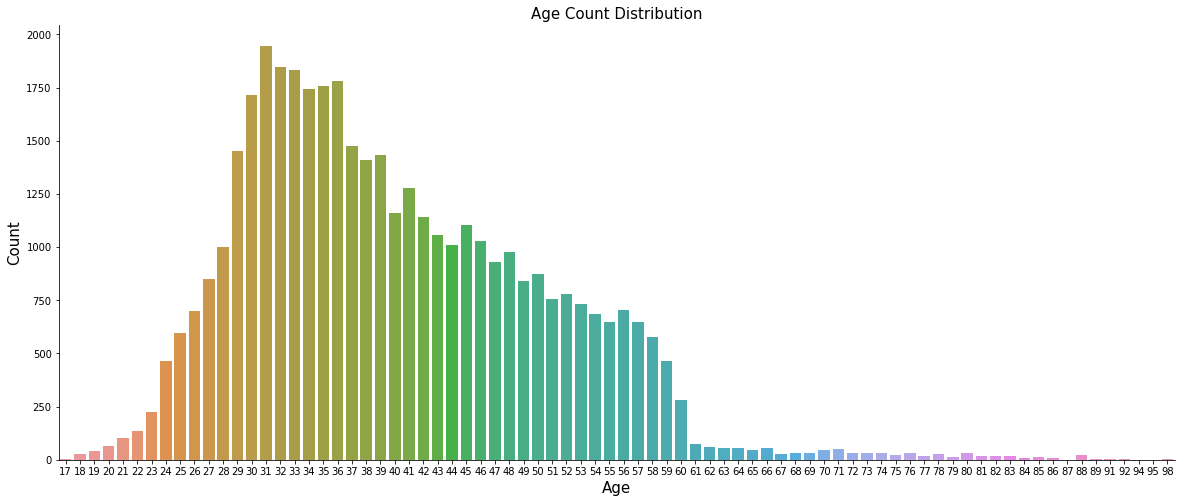

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client_df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

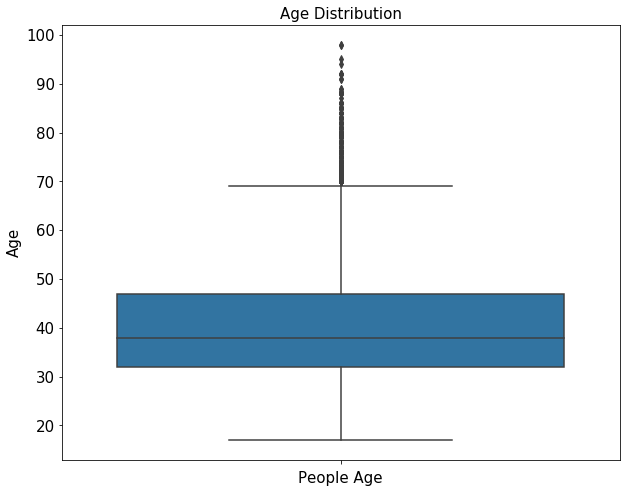

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(x = 'age', data = bank_client_df, orient = 'v')
ax.set_xlabel('People Age', fontsize=15)
ax.set_ylabel('Age', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
ax.tick_params(labelsize=15)


In [12]:
# Quartiles
print('1º Quartile: ', bank_client_df['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client_df['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client_df['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client_df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client_df['age'].quantile(q = 0.75) + 
                      1.5*(bank_client_df['age'].quantile(q = 0.75) - bank_client_df['age'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_client_df[bank_client_df['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client_df))
print('Outliers are:', round(bank_client_df[bank_client_df['age'] > 69.6]['age'].count()*100/len(bank_client_df),2), '%')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


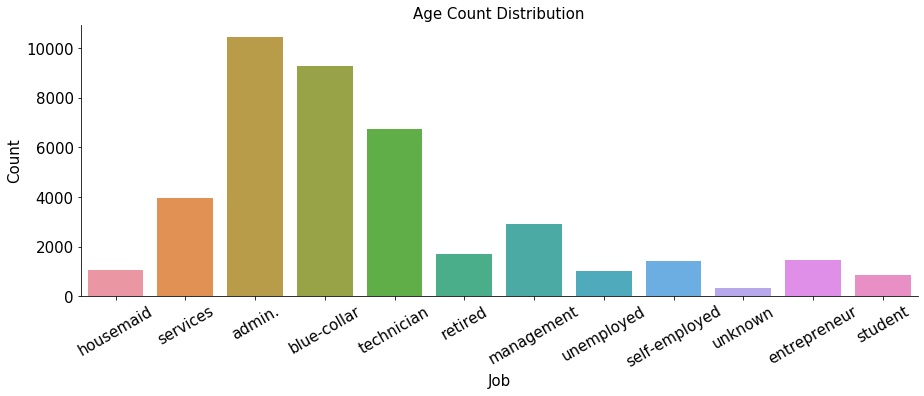

In [13]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job', data = bank_client_df)
ax.set_xlabel('Job', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

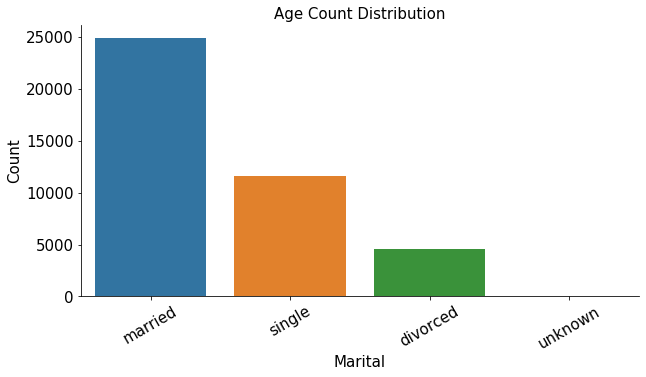

In [14]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client_df)
ax.set_xlabel('Marital', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

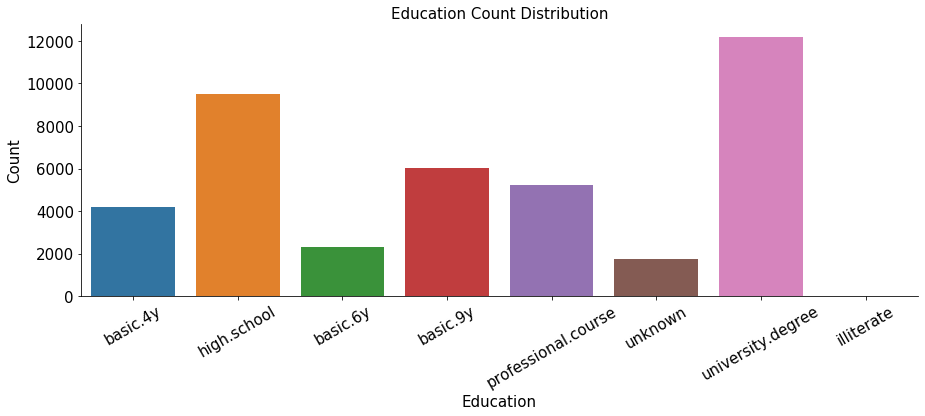

In [15]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education', data = bank_client_df)
ax.set_xlabel('Education', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

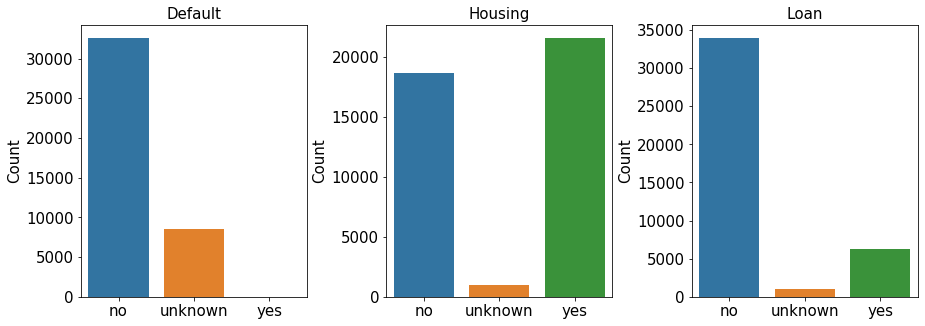

In [16]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'default', data = bank_client_df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client_df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client_df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.35)

In [0]:
bank_client_cat = bank_client_df[['job', 'marital', 'education', 'default', 'housing', 'loan']]

In [0]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# bank_client_cat = onehotencoder.fit_transform(bank_client_cat).toarray()

In [0]:
# print(type(bank_client_cat))
# bank_client_cat = pd.DataFrame(bank_client_cat)
# print(type(bank_client_cat))
# print(bank_client_cat.head())

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client_df['job']      = labelencoder_X.fit_transform(bank_client_df['job']) 
bank_client_df['marital']  = labelencoder_X.fit_transform(bank_client_df['marital']) 
bank_client_df['education']= labelencoder_X.fit_transform(bank_client_df['education']) 
bank_client_df['default']  = labelencoder_X.fit_transform(bank_client_df['default']) 
bank_client_df['housing']  = labelencoder_X.fit_transform(bank_client_df['housing']) 
bank_client_df['loan']     = labelencoder_X.fit_transform(bank_client_df['loan']) 

In [21]:
bank_client_df['age_binned'] = pd.cut(bank_client_df.age, bins=[0,32,47,70,98], labels=[1,2,3,4])
print(bank_client_df['age_binned'].head(10))

0    3
1    3
2    2
3    2
4    3
5    2
6    3
7    2
8    1
9    1
Name: age_binned, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [22]:
print(bank_client_df.head())
print(bank_client_df.shape)

   age  job  marital  education  default  housing  loan age_binned
0   56    3        1          0        0        0     0          3
1   57    7        1          3        1        0     0          3
2   37    7        1          3        0        2     0          2
3   40    0        1          1        0        0     0          2
4   56    7        1          3        0        0     2          3
(41188, 8)


Dataframe relacioanado ao ultimo contato da camapanha atual

In [23]:
bank_related_df = bank_df.loc[: , ['contact', 'month', 'day_of_week', 'duration']]
bank_related_df.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [24]:
print("Kind of Contact: \n", bank_related_df['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related_df['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related_df['day_of_week'].unique())


Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


In [25]:
bank_related_df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

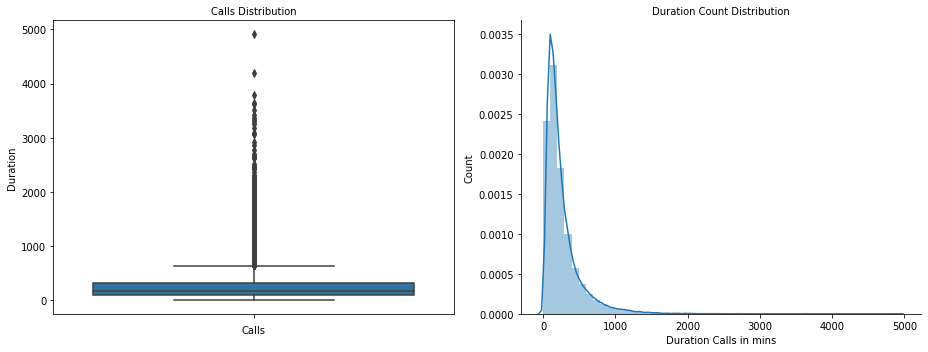

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related_df, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related_df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls in mins', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Duration Count Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [27]:
# Quartiles
print('1º Quartile: ', bank_related_df['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related_df['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related_df['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related_df['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related_df['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related_df['duration'].quantile(q = 0.75) - bank_related_df['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [28]:
bank_related_df[(bank_related_df['duration'] == 0)]

,contact,month,day_of_week,duration
6251,telephone,may,tue,0
23031,cellular,aug,tue,0
28063,cellular,apr,fri,0
33015,cellular,may,mon,0


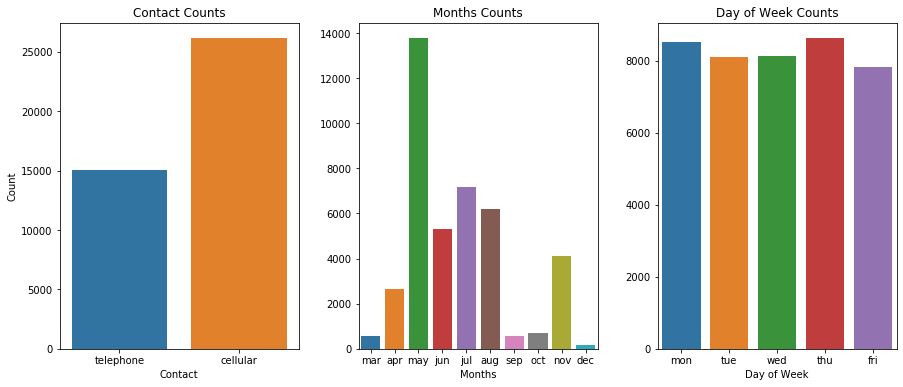

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related_df['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related_df['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related_df['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [30]:
bank_related_df['duration_binned'] = pd.cut(bank_related_df.duration, bins=[0,102,180,319,645], labels=[1,2,3,4])
print(bank_related_df['duration_binned'].head(10))

0    3
1    2
2    3
3    2
4    3
5    3
6    2
7    3
8    4
9    1
Name: duration_binned, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [0]:
#bank_related_cat = bank_related_df[['contact', 'month', 'day_of_week']]

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related_df['contact']     = labelencoder_X.fit_transform(bank_related_df['contact']) 
bank_related_df['month']       = labelencoder_X.fit_transform(bank_related_df['month']) 
bank_related_df['day_of_week'] = labelencoder_X.fit_transform(bank_related_df['day_of_week']) 

In [0]:
# onehotencoder = OneHotEncoder()
# bank_related_cat = onehotencoder.fit_transform(bank_related_cat).toarray()

In [0]:
# print(type(bank_related_cat))
# bank_related_cat = pd.DataFrame(bank_related_cat)
# print(type(bank_related_cat))
# print(bank_related_cat.head())

Dados sócio-economicos

In [35]:
bank_se_df = bank_df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se_df.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [36]:
bank_se_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
dtypes: float64(5)
memory usage: 1.6 MB


In [37]:
bank_o_df = bank_df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o_df.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [0]:
bank_o_df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [39]:
bank_o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 4 columns):
campaign    41188 non-null int64
pdays       41188 non-null int64
previous    41188 non-null int64
poutcome    41188 non-null int64
dtypes: int64(4)
memory usage: 1.3 MB


Modelagem

In [40]:
bank_final_df = pd.concat([bank_client_df, bank_related_df, bank_se_df, bank_o_df], axis = 1)
bank_final_df.shape

(41188, 22)

In [41]:
bank_final_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'age_binned', 'contact', 'month', 'day_of_week', 'duration',
       'duration_binned', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [42]:
print(bank_final_df.columns)
print(bank_final_df.shape)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'age_binned', 'contact', 'month', 'day_of_week', 'duration',
       'duration_binned', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')
(41188, 22)


In [0]:
bank_final_df.drop(['age','duration'], axis = 1, inplace = True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
#y=bank_df['y']
y = labelencoder_X.fit_transform(bank_df['y']) 
X_train, X_test, y_train, y_test = train_test_split(bank_final_df, y, stratify = y,  test_size = 0.35, random_state = 76)

In [46]:
y.mean()

0.11265417111780131

In [47]:
print(X_train.shape)
print(X_test.shape)

(26772, 20)
(14416, 20)


In [0]:
#from keras.layers import Dropout

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(20, )))
model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 126       
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
epochs_hist = model.fit(X_train, y_train, epochs = 5, batch_size = 2600, validation_split = 0.35)

Train on 17401 samples, validate on 9371 samples
Epoch 1/5
17401/17401 [==============================] - 1s 30us/sample - loss: 224.1627 - accuracy: 0.8074 - val_loss: 0.6906 - val_accuracy: 0.8794
Epoch 2/5
17401/17401 [==============================] - 0s 5us/sample - loss: 0.6894 - accuracy: 0.8916 - val_loss: 0.6881 - val_accuracy: 0.8794
Epoch 3/5
17401/17401 [==============================] - 0s 5us/sample - loss: 0.6868 - accuracy: 0.8916 - val_loss: 0.6855 - val_accuracy: 0.8794
Epoch 4/5
17401/17401 [==============================] - 0s 4us/sample - loss: 0.6842 - accuracy: 0.8916 - val_loss: 0.6830 - val_accuracy: 0.8794
Epoch 5/5
17401/17401 [==============================] - 0s 4us/sample - loss: 0.6816 - accuracy: 0.8916 - val_loss: 0.6804 - val_accuracy: 0.8794


In [53]:
scores = model.evaluate(X_test, y_test )

14416/14416 [==============================] - 1s 74us/sample - loss: 0.6802 - accuracy: 0.8873


In [54]:

print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))


['loss', 'accuracy']: 88.73%


In [55]:
predictions = model.predict(X_test)
predictions

array([[0.49154022],
       [0.49154022],
       [0.49154022],
       ...,
       [0.49154022],
       [0.49154022],
       [0.49154022]], dtype=float32)

In [0]:
y_pred = (predictions > 0.5)

In [57]:
y_pred.mean()

0.0

In [58]:
confusion_matrix(y_test, y_pred)

array([[12792,     0],
       [ 1624,     0]])